In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the main data file, skipping initial metadata rows and setting the correct header
df_population = pd.read_csv('/content/API_SP.POP.TOTL_DS2_en_csv_v2_246068.csv', skiprows=4)

# Display the first 5 rows of the DataFrame
display(df_population.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [ ]:
# Display the columns and their data types to identify potential variables
display(df_population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

None

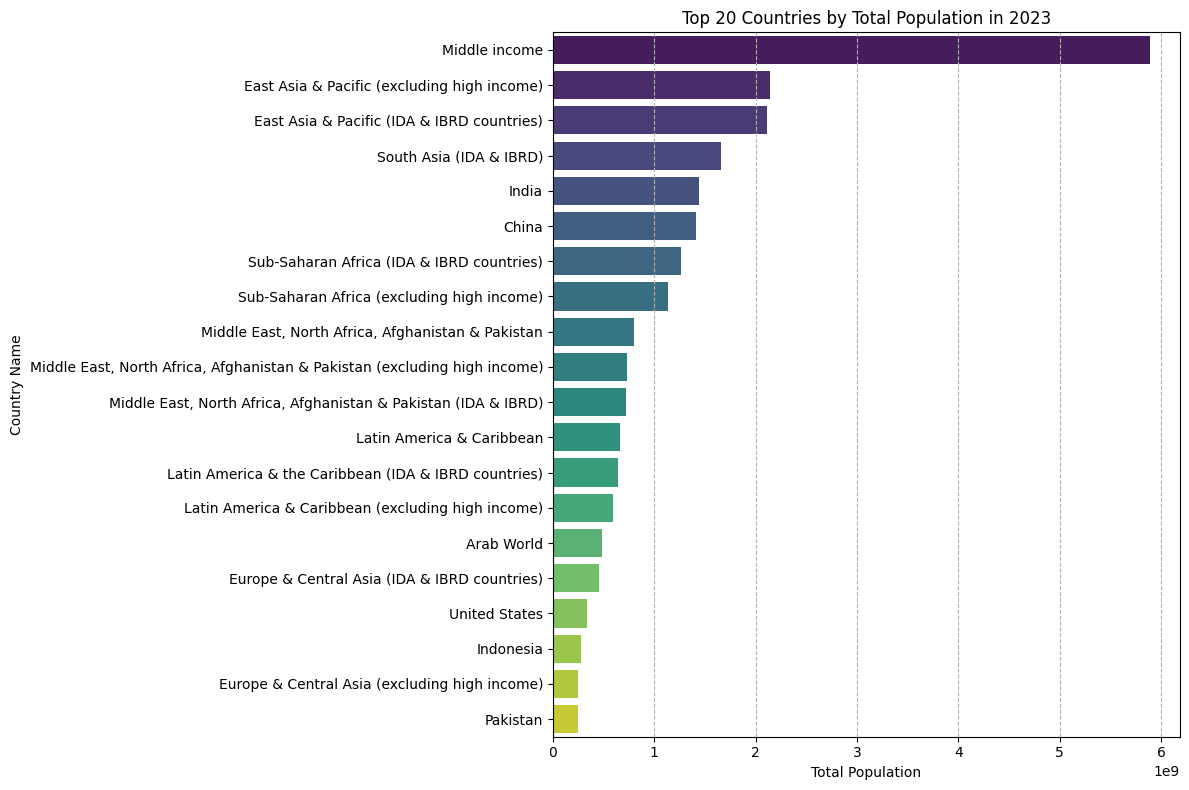

In [ ]:
# Drop the 'Unnamed: 69' column as it contains all NaN values
df_population = df_population.drop(columns=['Unnamed: 69'], errors='ignore')

# Melt the DataFrame to long format for easier plotting
df_melted = df_population.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Population'
)

# Convert 'Year' column to integer type
df_melted['Year'] = pd.to_numeric(df_melted['Year'])

# Filter for a specific year, e.g., 2023
df_2023 = df_melted[df_melted['Year'] == 2023]

# Filter out aggregate regions (heuristically, by checking for non-country codes)
# A common pattern for aggregate regions is to have Country Codes that are not 3 letters long,
# or to explicitly list common aggregate names.
# For simplicity, let's filter out some known aggregates that appear in similar datasets.
# Note: A more robust approach would be to use a separate metadata file if available.

# Example of filtering out some known aggregates if they exist in the 'Country Name' column
# This list can be expanded if more aggregates are identified during data exploration
aggregate_regions = [
    'World', 'High income', 'OECD members', 'Post-demographic dividend',
    'IDA & IBRD total', 'Low & middle income', 'Upper middle income',
    'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia',
    'European Union', 'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA total',
    'IDA blend', 'IDA only', 'Least developed countries: UN classification',
    'Low income', 'Lower middle income', 'Middle East & North Africa',
    'North America', 'Not classified', 'Pacific island small states',
    'Pre-demographic dividend', 'Small states', 'South Asia',
    'Sub-Saharan Africa', 'Euro area', 'Late-demographic dividend',
    'Africa Eastern and Southern', 'Africa Western and Central'
]
df_2023_countries = df_2023[~df_2023['Country Name'].isin(aggregate_regions)]

# Sort by population in descending order and select top N countries for better visualization
df_top_countries = df_2023_countries.sort_values(by='Population', ascending=False).head(20)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Population', y='Country Name', hue='Country Name', data=df_top_countries, palette='viridis', legend=False)
plt.title('Top 20 Countries by Total Population in 2023')
plt.xlabel('Total Population')
plt.ylabel('Country Name')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

All charts have been saved to your Colab environment. You can find them by clicking the folder icon in the left sidebar and download them from there.

In [ ]:
# Save the bar chart for Top 20 Countries by Total Population in 2023
plt.figure(figsize=(12, 8))
sns.barplot(x='Population', y='Country Name', hue='Country Name', data=df_top_countries, palette='viridis', legend=False)
plt.title('Top 20 Countries by Total Population in 2023')
plt.xlabel('Total Population')
plt.ylabel('Country Name')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.savefig('top_20_countries_2023_bar_chart.png', bbox_inches='tight')
plt.close()
print("Saved 'top_20_countries_2023_bar_chart.png'")

Saved 'top_20_countries_2023_bar_chart.png'


In [ ]:
# Save the line plot for Population Trends Over Time for Selected Countries
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Year',
    y='Population',
    hue='Country Name',
    data=df_selected_countries_trend,
    marker='o'
)
plt.title('Population Trends Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('population_trends_line_plot.png', bbox_inches='tight')
plt.close()
print("Saved 'population_trends_line_plot.png'")

Saved 'population_trends_line_plot.png'


In [ ]:
# Save the bar chart for Top 20 Countries by Total Population in 2024
plt.figure(figsize=(12, 8))
sns.barplot(x='Population', y='Country Name', hue='Country Name', data=df_top_countries_2024, palette='viridis', legend=False)
plt.title('Top 20 Countries by Total Population in 2024')
plt.xlabel('Total Population')
plt.ylabel('Country Name')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.savefig('top_20_countries_2024_bar_chart.png', bbox_inches='tight')
plt.close()
print("Saved 'top_20_countries_2024_bar_chart.png'")

Saved 'top_20_countries_2024_bar_chart.png'


In [ ]:
# Save the histogram for Distribution of Country Populations in 2024
plt.figure(figsize=(12, 8))
sns.histplot(df_2024_countries_filtered['Population'].dropna(), bins=50, kde=True)
plt.title('Distribution of Country Populations in 2024')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('population_distribution_2024_histogram.png', bbox_inches='tight')
plt.close()
print("Saved 'population_distribution_2024_histogram.png'")

Saved 'population_distribution_2024_histogram.png'


All charts have been saved to your Colab environment. You can find them by clicking the folder icon in the left sidebar and download them from there.

In [ ]:
# Save the last generated plot (the histogram) as a PNG file
plt.savefig('population_distribution_2024.png', bbox_inches='tight')
print("Histogram saved as 'population_distribution_2024.png'")

Histogram saved as 'population_distribution_2024.png'


<Figure size 640x480 with 0 Axes>

You can find 'population_distribution_2024.png' in the Colab file browser (click the folder icon on the left sidebar) and download it from there.

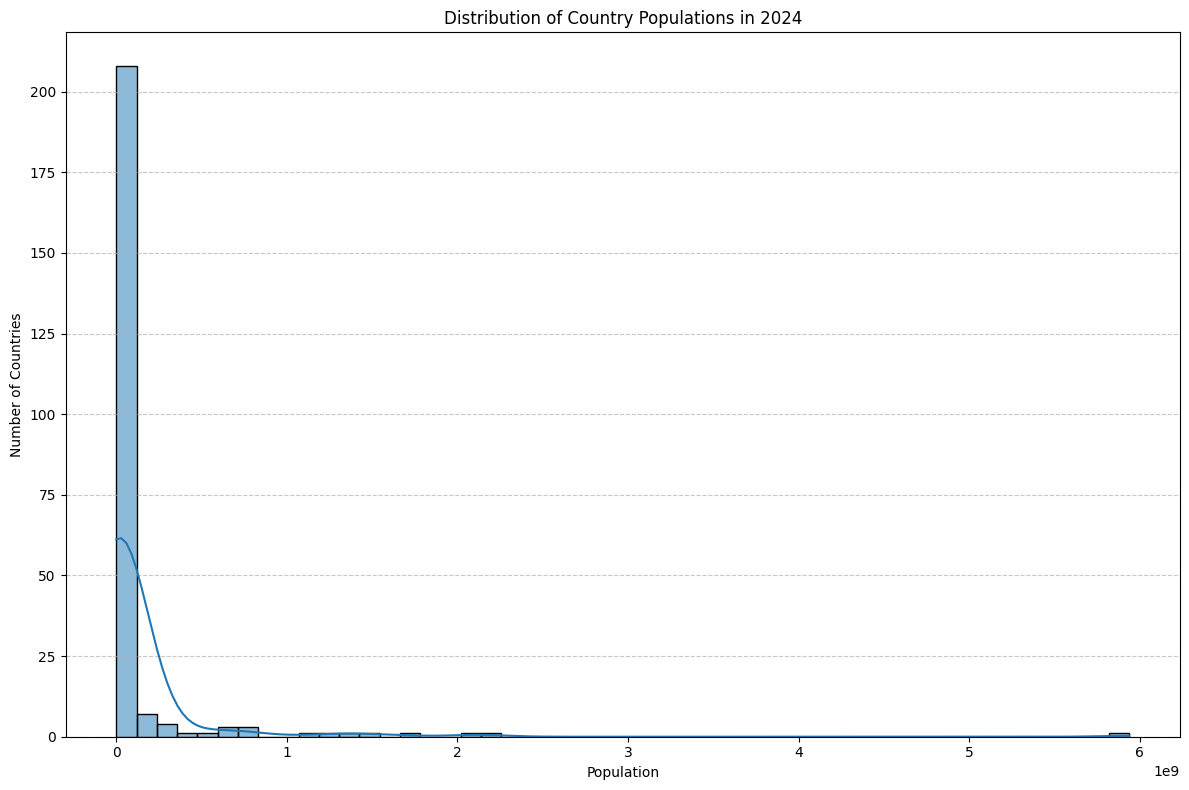

In [ ]:
# Filter for the latest year, 2024, and exclude aggregate regions
df_2024_countries_filtered = df_melted[
    (df_melted['Year'] == 2024) &
    (~df_melted['Country Name'].isin(aggregate_regions))
]

# Create a histogram of the population distribution
plt.figure(figsize=(12, 8))
sns.histplot(df_2024_countries_filtered['Population'].dropna(), bins=50, kde=True)
plt.title('Distribution of Country Populations in 2024')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

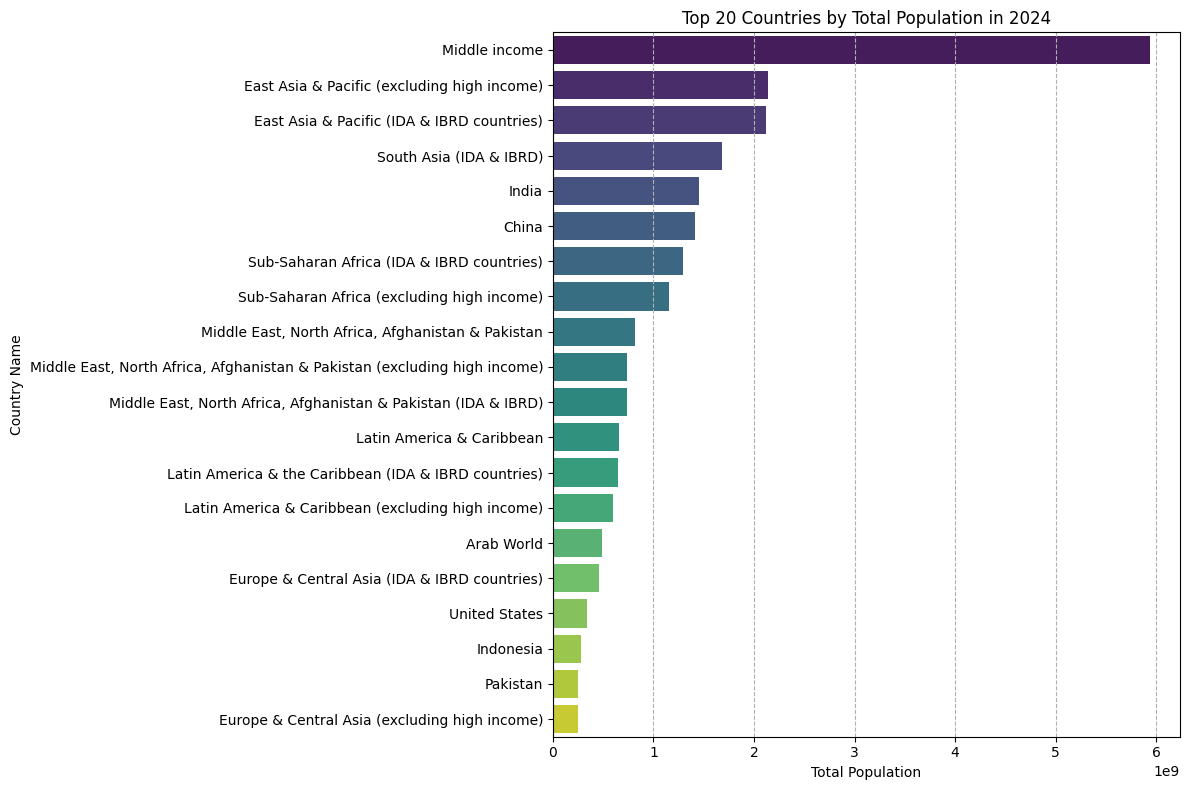

In [ ]:
# Filter for the latest year, 2024
df_2024 = df_melted[df_melted['Year'] == 2024]

# Filter out aggregate regions using the previously defined list
df_2024_countries = df_2024[~df_2024['Country Name'].isin(aggregate_regions)]

# Sort by population in descending order and select top 20 countries for better visualization
df_top_countries_2024 = df_2024_countries.sort_values(by='Population', ascending=False).head(20)

# Create the bar chart for 2024
plt.figure(figsize=(12, 8))
sns.barplot(x='Population', y='Country Name', hue='Country Name', data=df_top_countries_2024, palette='viridis', legend=False)
plt.title('Top 20 Countries by Total Population in 2024')
plt.xlabel('Total Population')
plt.ylabel('Country Name')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

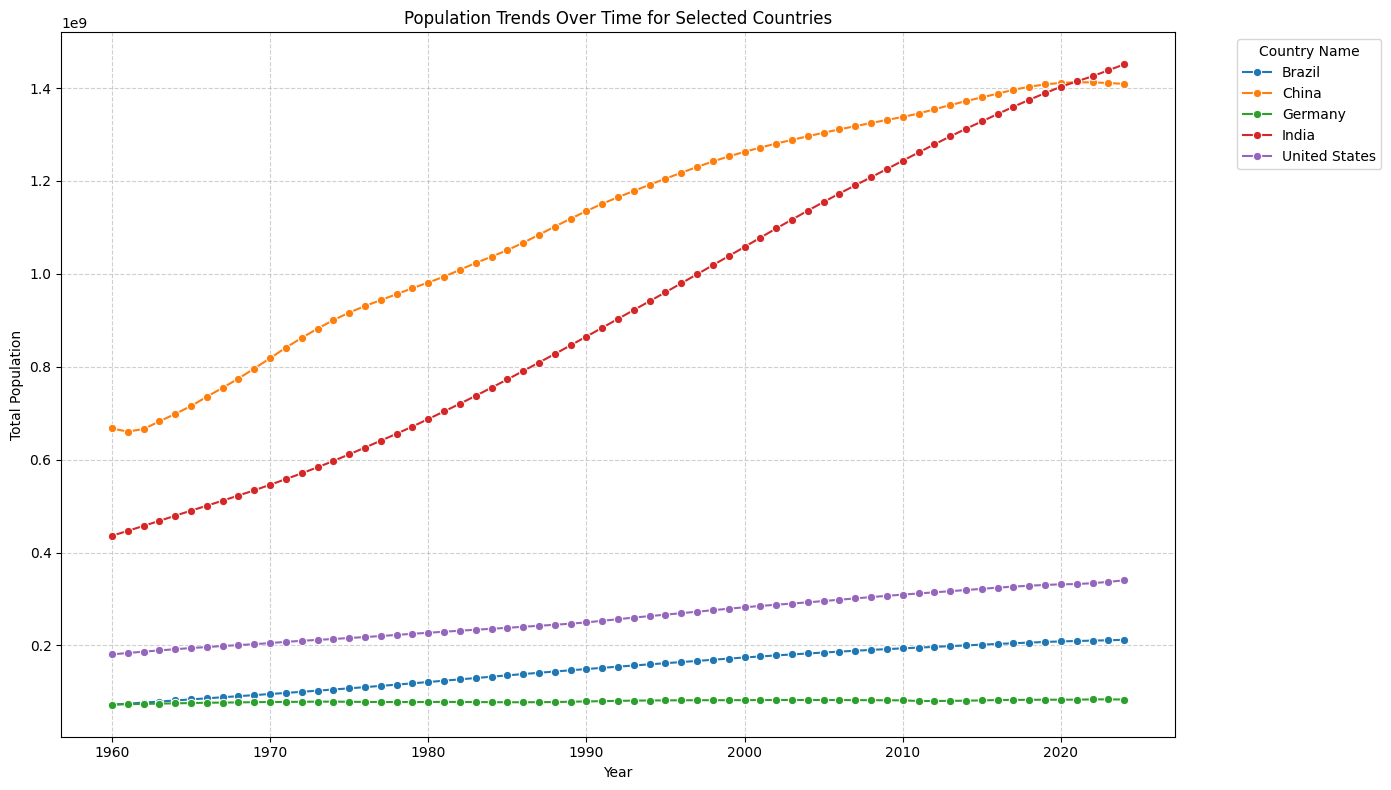

In [ ]:
# Select a few countries to visualize their population trends
selected_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']

# Filter the melted DataFrame for the selected countries
df_selected_countries_trend = df_melted[df_melted['Country Name'].isin(selected_countries)]

# Create a line plot to visualize population trends over time
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Year',
    y='Population',
    hue='Country Name',
    data=df_selected_countries_trend,
    marker='o' # Add markers for each year for better readability
)
plt.title('Population Trends Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()